array([ -2.01944754, 217.62616911, -96.56248368])
289.99999999999983
459.9999998927543 460
232.00000025022467 232
177.99999985702038 178
99.99999999999842


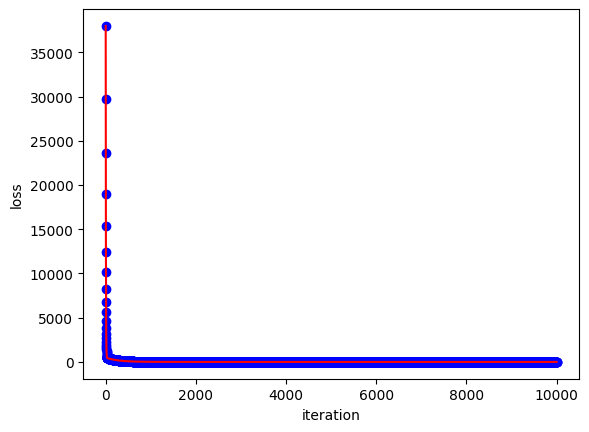

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

class LinearRegression:

    def __init__(self, learning_rate: float = 0.01, n_iters: int = 1000) -> None:
        '''
        Args:
            learning_rate: float
            n_iters: int
        '''
        # learning rate
        self.lr = learning_rate
        # number of iterations to find the optimal paramaters or to train the model
        self.n_iters = n_iters
        # weights with inittial values
        self.weight = np.array([0, 0, 0], dtype=np.float64)
        # bias with inittial values
        self.bias = 0.0
        # loss history 
        self.loss_hist = []
    
    def compute_loss(self, x_train: np.ndarray, y_train: np.ndarray) -> float:
        '''
        Computes the mean squared error, which is how far the predicted value is from the actual value

        Args:
            x_train: ndarray (n, m) where n is number of samples and m is number of features
            y_train: ndarray (n,) where n is number of samples 
        Returns:
            loss: float  
        '''
        # caluclate predicted value
        fwb = np.dot(x_train, self.weight) + self.bias 
        # calculate loss
        loss = np.mean((fwb - y_train) ** 2) / 2
        
        return loss

    
    def compute_gradient(self, x_train: np.ndarray, y_train: np.ndarray) -> tuple:
        '''
        Args:
            x_train: ndarray (n, m) where n is number of samples and m is number of features
            y_train: ndarray (n,) where n is number of samples 
        Returns:
            dW: ndarray(m,) partial derivation of loss with respect to weight
            db: float paritial derivation of loss with respect to bias
        '''
        m = x_train.shape[1]
        # claculate predicted value
        fwb = np.dot(x_train, self.weight) + self.bias 

        # caculate error
        err = fwb - y_train

        # calculate partial derivation of loss with respect to weight
        dW = np.reshape(err, (m, -1)) * x_train 
        dW = np.sum(dW, axis=0) / m

        # calculate partial derivation of loss with respect to bias
        db = np.mean(fwb - y_train)

        return dW, db

    
    def fit(self, x_train: np.ndarray, y_train: np.ndarray) -> None:
        '''
        Args:
            x_train: ndarray (n, m) where n is number of samples and m is number of features
            y_train: ndarray (n,) where n is number of samples
        '''
        # training loop
        for _ in range(self.n_iters):
            dW, db = self.compute_gradient(x_train, y_train)
            # update parameters
            self.weight -= self.lr * dW
            self.bias -= self.lr * db
            # calculate loss
            loss = self.compute_loss(x_train, y_train)
            self.loss_hist.append(loss)
        
    
    def predict(self, x_test: np.ndarray) -> np.ndarray:
        '''
        Predicts the house price based on the given house features

        Args:
            x_test: ndarray (n, m) where n is number of samples and m is number of features
        Returns:
            y_pred: ndarray (n,) where n is number of samples
        '''
        y_pred = np.dot(x_test, self.weight) + self.bias
        return y_pred

def zscore_normalize_features(x_train: np.ndarray) -> tuple:
    '''
    Normalizes the features in x
    Args:
        x: ndarray (n, m) where n is number of samples and m is number of features
    Returns:
        x: ndarray (n, m) where n is number of samples and m is number of features
        mu: ndarray (m,) where m is number of features
        sigma: ndarray (m,) where m is number of features
    '''
    mu = x_train.mean(axis=0)
    sigma = x_train.std(axis=0)
    x_norm = (x_train - mu) / sigma
    return x_norm, mu, sigma

# Lets generate a dataset
data = pd.DataFrame(data = [[2104, 5, 45, 460], [1416, 3, 40, 232], [852, 2, 35, 178]], columns = ['Size(sqft)', 'bedrooms', 'age', 'price'])
x_train = data[['Size(sqft)', 'bedrooms', 'age']].to_numpy()
y_train = data['price'].values

# Normalize features
x_norm, mu, sigma = zscore_normalize_features(x_train)

# define hyperparameters
lr =  0.1
n_iter = 10000

# Create and train model
lr_model = LinearRegression(learning_rate = lr, n_iters = n_iter)
lr_model.fit(x_norm, y_train)

# parameters
print(repr(lr_model.weight))
print(repr(lr_model.bias))

# Prediction
predicted = lr_model.predict(x_norm)
for i in range(len(predicted)):
    print(predicted[i], y_train[i])

# Caculating accuracy based on last loss hisotry
print((1 - lr_model.loss_hist[-1]) * 100)

# Plot loss history
plt.scatter(np.arange(1, n_iter + 1), lr_model.loss_hist, c='b')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(np.arange(1, n_iter + 1),lr_model.loss_hist, c='r')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=39a136b1-8191-420f-afab-bb238316f4d7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>